# Highlight Spectrograms in cloud of points

In [1]:
import os
import numpy as np
import torch
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from joblib import dump, load

from time import sleep
from tqdm import tqdm
import matplotlib.patches as mpatches

from datetime import datetime, timedelta

from sklearn.neighbors import KNeighborsClassifier


from bring_features_and_file_paths import bring_features_and_file_paths
from bring_features_and_file_paths import from_spectrogram_path_to_BirdNET_output_path
from bring_features_and_file_paths import get_spectrogram_time_mark_in_file
from bring_features_and_file_paths import get_BirdNET_detections
from bring_features_and_file_paths import transform_features

## Bring all the features and file paths

In [2]:
features, file_paths = bring_features_and_file_paths('/grand/projects/BirdAudio/Soundscapes/Second_Features/')

We have 1976583 feature vectors.


## Choose mic and day

In [3]:
'/grand/projects/BirdAudio/Soundscapes/Audio_Files/set1/00023764/20210526_STUDY/'
#relevant_path = 'set3/00023771/20210817_STUDY/'
relevant_path = 'set1/00023764/20210526_STUDY/'
# relevant_path = 'set1/00023757/20210702_STUDY/'

features1=[]
file_paths1=[]
hours=[]
for k, (feature, file_path) in enumerate(zip(features, file_paths)):
#     if relevant_path==''.join([chr(int(x)) for x in file_path]).replace('~','')[:32]:
    if relevant_path==''.join([chr(int(x)) for x in file_path]).replace('~','')[:29]:
        print(k)
        A=datetime.strptime(''.join([chr(int(x)) for x in file_path]).replace('~','')[29:44], '%Y%m%dT%H%M%S')
        seconds=int(''.join([chr(int(x)) for x in file_path]).replace('~','')[54:-4])*9
        A=A+timedelta(seconds=seconds)
        features1.append(np.array(feature))
        file_paths1.append(file_path)
        hours.append(A.hour)

features1=np.array(features1)
file_paths1=np.array(file_paths1)
hours=np.array(hours)

1196427
1196428
1196429
1196430
1196431
1196432
1196433
1196434
1196435
1196436
1196437
1196438
1196439
1196440
1196441
1196442
1196443
1196444
1196445
1196446
1196447
1196448
1196449
1196450
1196451
1196452
1196453
1196454
1196455
1196456
1196457
1196458
1196459
1196460
1196461
1196462
1196463
1196464
1196465
1196466
1196467
1196468
1196469
1196470
1196471
1196472
1196473
1196474
1196475
1196476
1196477
1196478
1196479
1196480
1196481
1196482
1196483
1196484
1196485
1196486
1196487
1196488
1196489
1196490
1196491
1196492
1196493
1196494
1196495
1196496
1196497
1196498
1196499
1196500
1196501
1196502
1196503
1196504
1196505
1196506
1196507
1196508
1196509
1196510
1196511
1196512
1196513
1196514
1196515
1196516
1196517
1196518
1196519
1196520
1196521
1196522
1196523
1196524
1196525
1196526
1196527
1196528
1196529
1196530
1196531
1196532
1196533
1196534
1196535
1196536
1196537
1196538
1196539
1196540
1196541
1196542
1196543
1196544
1196545
1196546
1196547
1196548
1196549
1196550
1196551


1197802
1197803
1197804
1197805
1197806
1197807
1197808
1197809
1197810
1197811
1197812
1197813
1197814
1197815
1197816
1197817
1197818
1197819
1197820
1197821
1197822
1197823
1197824
1197825
1197826
1197827
1197828
1197829
1197830
1197831
1197832
1197833
1197834
1197835
1197836
1197837
1197838
1197839
1197840
1197841
1197842
1197843
1197844
1197845
1197846
1197847
1197848
1197849
1197850
1197851
1197852
1197853
1197854
1197855
1197856
1197857
1197858
1197859
1197860
1197861
1197862
1197863
1197864
1197865
1197866
1197867
1197868
1197869
1197870
1197871
1197872
1197873
1197874
1197875
1197876
1197877
1197878
1197879
1197880
1197881
1197882
1197883
1197884
1197885
1197886
1197887
1197888
1197889
1197890
1197891
1197892
1197893
1197894
1197895
1197896
1197897
1197898
1197899
1197900
1197901
1197902
1197903
1197904
1197905
1197906
1197907
1197908
1197909
1197910
1197911
1197912
1197913
1197914
1197915
1197916
1197917
1197918
1197919
1197920
1197921
1197922
1197923
1197924
1197925
1197926


1199118
1199119
1199120
1199121
1199122
1199123
1199124
1199125
1199126
1199127
1199128
1199129
1199130
1199131
1199132
1199133
1199134
1199135
1199136
1199137
1199138
1199139
1199140
1199141
1199142
1199143
1199144
1199145
1199146
1199147
1199148
1199149
1199150
1199151
1199152
1199153
1199154
1199155
1199156
1199157
1199158
1199159
1199160
1199161
1199162
1199163
1199164
1199165
1199166
1199167
1199168
1199169
1199170
1199171
1199172
1199173
1199174
1199175
1199176
1199177
1199178
1199179
1199180
1199181
1199182
1199183
1199184
1199185
1199186
1199187
1199188
1199189
1199190
1199191
1199192
1199193
1199194
1199195
1199196
1199197
1199198
1199199
1199200
1199201
1199202
1199203
1199204
1199205
1199206
1199207
1199208
1199209
1199210
1199211
1199212
1199213
1199214
1199215
1199216
1199217
1199218
1199219
1199220
1199221
1199222
1199223
1199224
1199225
1199226
1199227
1199228
1199229
1199230
1199231
1199232
1199233
1199234
1199235
1199236
1199237
1199238
1199239
1199240
1199241
1199242


1200393
1200394
1200395
1200396
1200397
1200398
1200399
1200400
1200401
1200402
1200403
1200404
1200405
1200406
1200407
1200408
1200409
1200410
1200411
1200412
1200413
1200414
1200415
1200416
1200417
1200418
1200419
1200420
1200421
1200422
1200423
1200424
1200425
1200426
1200427
1200428
1200429
1200430
1200431
1200432
1200433
1200434
1200435
1200436
1200437
1200438
1200439
1200440
1200441
1200442
1200443
1200444
1200445
1200446
1200447
1200448
1200449
1200450
1200451
1200452
1200453
1200454
1200455
1200456
1200457
1200458
1200459
1200460
1200461
1200462
1200463
1200464
1200465
1200466
1200467
1200468
1200469
1200470
1200471
1200472
1200473
1200474
1200475
1200476
1200477
1200478
1200479
1200480
1200481
1200482
1200483
1200484
1200485
1200486
1200487
1200488
1200489
1200490
1200491
1200492
1200493
1200494
1200495
1200496
1200497
1200498
1200499
1200500
1200501
1200502
1200503
1200504
1200505
1200506
1200507
1200508
1200509
1200510
1200511
1200512
1200513
1200514
1200515
1200516
1200517


1201688
1201689
1201690
1201691
1201692
1201693
1201694
1201695
1201696
1201697
1201698
1201699
1201700
1201701
1201702
1201703
1201704
1201705
1201706
1201707
1201708
1201709
1201710
1201711
1201712
1201713
1201714
1201715
1201716
1201717
1201718
1201719
1201720
1201721
1201722
1201723
1201724
1201725
1201726
1201727
1201728
1201729
1201730
1201731
1201732
1201733
1201734
1201735
1201736
1201737
1201738
1201739
1201740
1201741
1201742
1201743
1201744
1201745
1201746
1201747
1201748
1201749
1201750
1201751
1201752
1201753
1201754
1201755
1201756
1201757
1201758
1201759
1201760
1201761
1201762
1201763
1201764
1201765
1201766
1201767
1201768
1201769
1201770
1201771
1201772
1201773
1201774
1201775
1201776
1201777
1201778
1201779
1201780
1201781
1201782
1201783
1201784
1201785
1201786
1201787
1201788
1201789
1201790
1201791
1201792
1201793
1201794
1201795
1201796
1201797
1201798
1201799
1201800
1201801
1201802
1201803
1201804
1201805
1201806
1201807
1201808
1201809
1201810
1201811
1201812


1202972
1202973
1202974
1202975
1202976
1202977
1202978
1202979
1202980
1202981
1202982
1202983
1202984
1202985
1202986
1202987
1202988
1202989
1202990
1202991
1202992
1202993
1202994
1202995
1202996
1202997
1202998
1202999
1203000
1203001
1203002
1203003
1203004
1203005
1203006
1203007
1203008
1203009
1203010
1203011
1203012
1203013
1203014
1203015
1203016
1203017
1203018
1203019
1203020
1203021
1203022
1203023
1203024
1203025
1203026
1203027
1203028
1203029
1203030
1203031
1203032
1203033
1203034
1203035
1203036
1203037
1203038
1203039
1203040
1203041
1203042
1203043
1203044
1203045
1203046
1203047
1203048
1203049
1203050
1203051
1203052
1203053
1203054
1203055
1203056
1203057
1203058
1203059
1203060
1203061
1203062
1203063
1203064
1203065
1203066
1203067
1203068
1203069
1203070
1203071
1203072
1203073
1203074
1203075
1203076
1203077
1203078
1203079
1203080
1203081
1203082
1203083
1203084
1203085
1203086
1203087
1203088
1203089
1203090
1203091
1203092
1203093
1203094
1203095
1203096


1204273
1204274
1204275
1204276
1204277
1204278
1204279
1204280
1204281
1204282
1204283
1204284
1204285
1204286
1204287
1204288
1204289
1204290
1204291
1204292
1204293
1204294
1204295
1204296
1204297
1204298
1204299
1204300
1204301
1204302
1204303
1204304
1204305
1204306
1204307
1204308
1204309
1204310
1204311
1204312
1204313
1204314
1204315
1204316
1204317
1204318
1204319
1204320
1204321
1204322
1204323
1204324
1204325
1204326
1204327
1204328
1204329
1204330
1204331
1204332
1204333
1204334
1204335
1204336
1204337
1204338
1204339
1204340
1204341
1204342
1204343
1204344
1204345
1204346
1204347
1204348
1204349
1204350
1204351
1204352
1204353
1204354
1204355
1204356
1204357
1204358
1204359
1204360
1204361
1204362
1204363
1204364
1204365
1204366
1204367
1204368
1204369
1204370
1204371
1204372
1204373
1204374
1204375
1204376
1204377
1204378
1204379
1204380
1204381
1204382
1204383
1204384
1204385
1204386
1204387
1204388
1204389
1204390
1204391
1204392
1204393
1204394
1204395
1204396
1204397


1205562
1205563
1205564
1205565
1205566
1205567
1205568
1205569
1205570
1205571
1205572
1205573
1205574
1205575
1205576
1205577
1205578
1205579
1205580
1205581
1205582
1205583
1205584
1205585
1205586
1205587
1205588
1205589
1205590
1205591
1205592
1205593
1205594
1205595
1205596
1205597
1205598
1205599
1205600
1205601
1205602
1205603
1205604
1205605
1205606
1205607
1205608
1205609
1205610
1205611
1205612
1205613
1205614
1205615
1205616
1205617
1205618
1205619
1205620
1205621
1205622
1205623
1205624
1205625
1205626
1205627
1205628
1205629
1205630
1205631
1205632
1205633
1205634
1205635
1205636
1205637
1205638
1205639
1205640
1205641
1205642
1205643
1205644
1205645
1205646
1205647
1205648
1205649
1205650
1205651
1205652
1205653
1205654
1205655
1205656
1205657
1205658
1205659
1205660
1205661
1205662
1205663
1205664
1205665
1205666
1205667
1205668
1205669
1205670
1205671
1205672
1205673
1205674
1205675
1205676
1205677
1205678
1205679
1205680
1205681
1205682
1205683
1205684
1205685
1205686


/tmp/ipykernel_8838/1448709739.py:21: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  file_paths1=np.array(file_paths1)
/tmp/ipykernel_8838/1448709739.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  file_paths1=np.array(file_paths1)


Now, we want to transform the features, scaling them and reducing their dimensionality

In [4]:
dim_red_model = load('/grand/projects/BirdAudio/Soundscapes/Clusters/SecondClusters/dim_red_model')
scale_model = load('/grand/projects/BirdAudio/Soundscapes/Clusters/SecondClusters/scale_model')

In [5]:
samples = transform_features(features, scale_model, dim_red_model)
samples.shape

(1976583, 2)

In [6]:
samples1 = transform_features(features1, scale_model, dim_red_model)
samples1.shape

(9576, 2)

/tmp/ipykernel_8838/2996754637.py:38: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(f"daytimepoints1.png", dpi=300)
/home/demattie/.conda/envs/soundscape_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


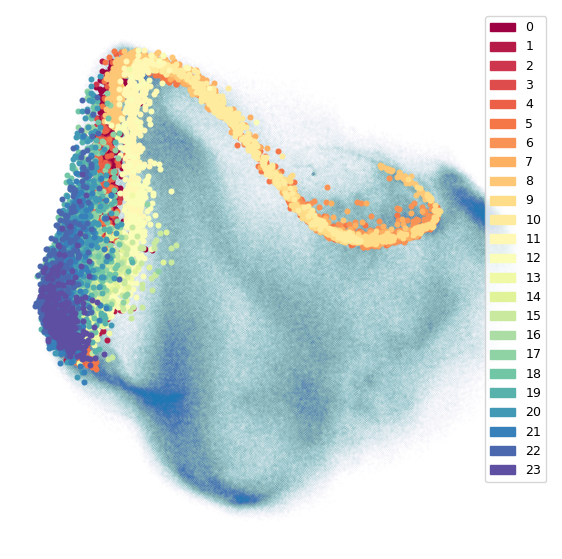

In [7]:
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, 24)]
patches=[]
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()
#ax.scatter(vectors[:,0],vectors[:,1], 0.01)
ax.scatter(samples[:,0],
           samples[:,1],
           s=0.00002
          )
for hour, col in zip(range(24), colors):
    indices=np.where(hours==hour)
#     ax.scatter(samples1[indices,0],
#                samples1[indices,1],
#                s=10
#               )
    ax.plot(
        samples1[indices,0],
        samples1[indices,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor=col,
        markersize=3.3,
    )

    patch = mpatches.Patch(color=col, label=hour)
    patches.append(patch)

ax.legend(handles=patches, fontsize="9")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_xticks([])
ax.set_yticks([])

plt.savefig(f"daytimepoints1.png", dpi=300)